✅ Loaded data:
 - Logs: 13995 rows, columns = ['id', 'timecreated', 'eventname', 'action', 'target', 'userid', 'courseid', 'other']
 - Grades: 233 rows, columns = ['id', 'timemodified', 'userid', 'courseid', 'finalgrade', 'itemtype']



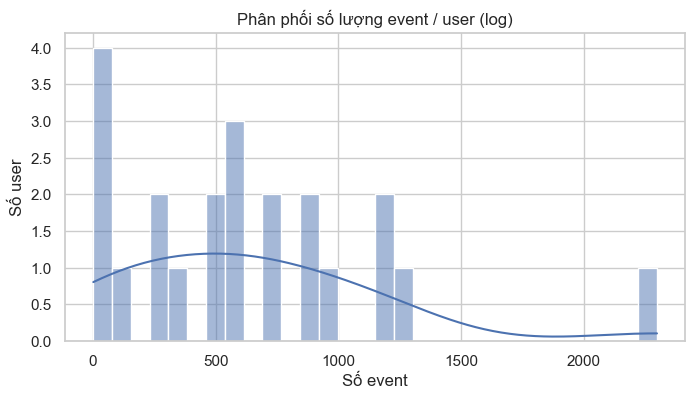

📈 Số event trung bình mỗi user: 636.1363636363636
📈 Phân vị (25%, 50%, 75%): {0.25: 261.25, 0.5: 560.0, 0.75: 910.0}



C:\Users\USER\AppData\Local\Temp\ipykernel_37476\1690923248.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="Blues_d")


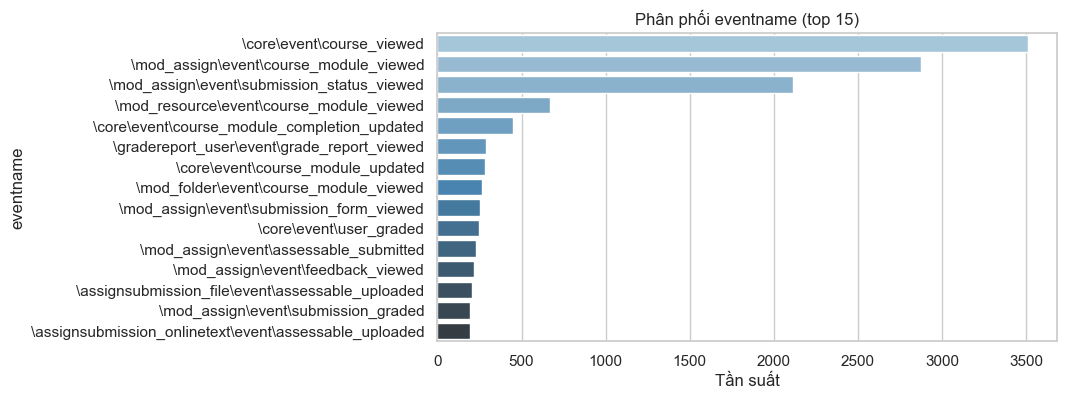

C:\Users\USER\AppData\Local\Temp\ipykernel_37476\1690923248.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="Blues_d")


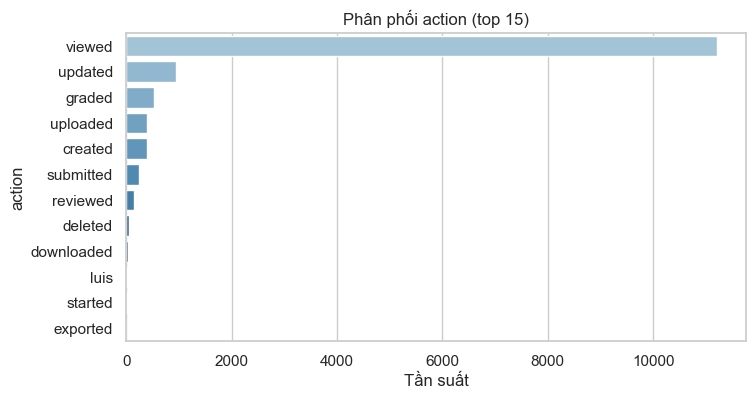

C:\Users\USER\AppData\Local\Temp\ipykernel_37476\1690923248.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="Blues_d")


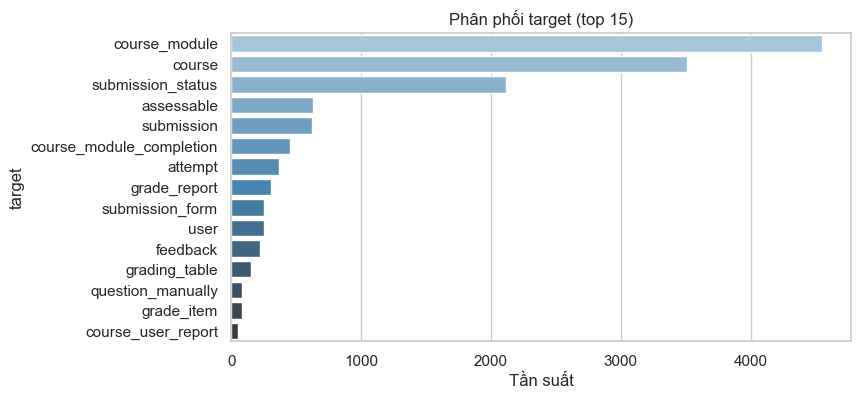

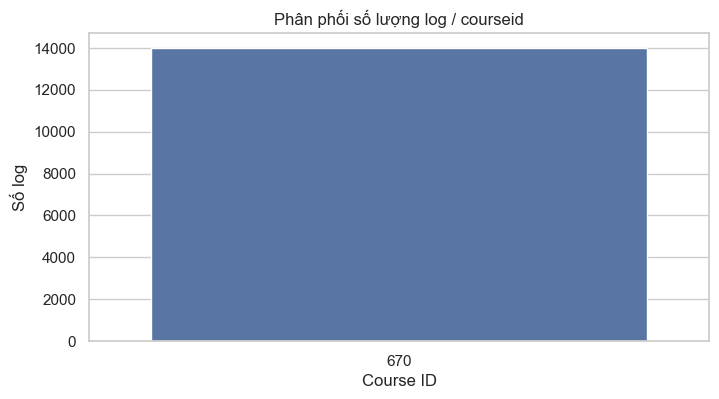

📊 Số course khác nhau trong log: 1



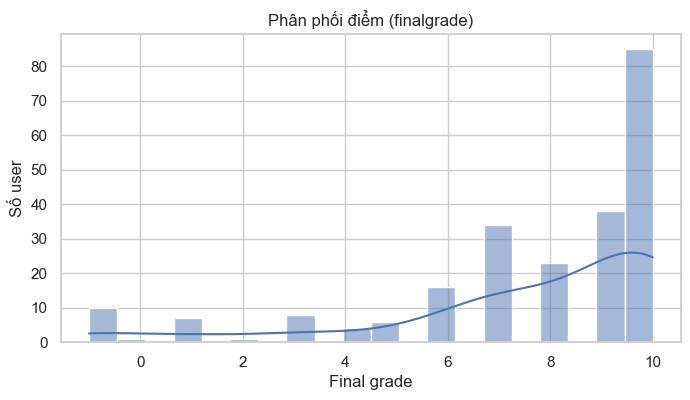

📈 Thống kê điểm số:
count    233.000000
mean       7.635193
std        2.947816
min       -1.000000
25%        7.000000
50%        9.000000
75%       10.000000
max       10.000000
Name: finalgrade, dtype: float64



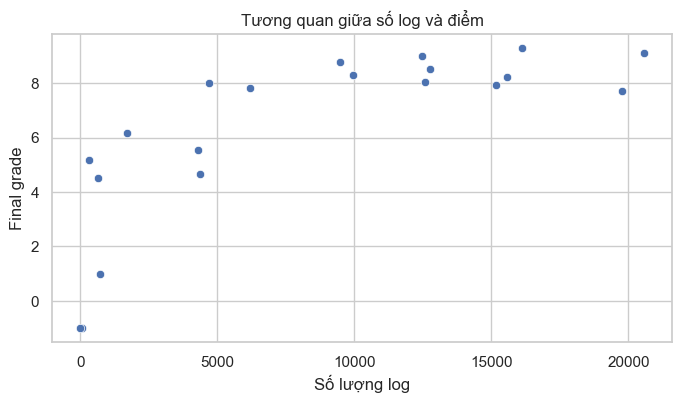

🔗 Hệ số tương quan (corr) giữa số log và finalgrade: 0.7504

📋 Tổng quan thống kê:
 - num_logs: 13995
 - num_grades: 233
 - num_users_log: 22
 - num_users_grade: 21
 - num_common_users: 20
 - num_event_types: 65
 - num_actions: 12
 - num_targets: 34


In [1]:
# 📊 Phân tích phân phối dataset Moodle (bỏ qua yếu tố thời gian)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Cấu hình hiển thị ---
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,4)

# --- Đọc dữ liệu ---
log_path = "../data/udk_moodle_log_course_670.csv"
grade_path = "../data/udk_moodle_grades_course_670.csv"

log_df = pd.read_csv(log_path)
grade_df = pd.read_csv(grade_path)

print("✅ Loaded data:")
print(f" - Logs: {len(log_df)} rows, columns = {list(log_df.columns)}")
print(f" - Grades: {len(grade_df)} rows, columns = {list(grade_df.columns)}")
print()

# --- Làm sạch cơ bản ---
log_df = log_df.dropna(subset=["userid"])
grade_df = grade_df.dropna(subset=["userid"])
log_df["userid"] = log_df["userid"].astype(int)
grade_df["userid"] = grade_df["userid"].astype(int)

# ============================================================
# 1️⃣ PHÂN PHỐI THEO USER
# ============================================================
user_event_counts = log_df.groupby("userid")["id"].count().sort_values(ascending=False)
plt.figure()
sns.histplot(user_event_counts, bins=30, kde=True)
plt.title("Phân phối số lượng event / user (log)")
plt.xlabel("Số event")
plt.ylabel("Số user")
plt.show()
print("📈 Số event trung bình mỗi user:", user_event_counts.mean())
print("📈 Phân vị (25%, 50%, 75%):", user_event_counts.quantile([0.25, 0.5, 0.75]).to_dict())
print()

# ============================================================
# 2️⃣ PHÂN PHỐI EVENTNAME / ACTION / TARGET
# ============================================================
def plot_bar_count(df, col, title, topn=15):
    vc = df[col].value_counts().head(topn)
    plt.figure()
    sns.barplot(x=vc.values, y=vc.index, palette="Blues_d")
    plt.title(f"{title} (top {topn})")
    plt.xlabel("Tần suất")
    plt.ylabel(col)
    plt.show()
    return vc

event_dist = plot_bar_count(log_df, "eventname", "Phân phối eventname")
action_dist = plot_bar_count(log_df, "action", "Phân phối action")
target_dist = plot_bar_count(log_df, "target", "Phân phối target")

# ============================================================
# 3️⃣ PHÂN PHỐI THEO COURSE / MODULE
# ============================================================
course_dist = log_df["courseid"].value_counts()
plt.figure()
sns.barplot(x=course_dist.index.astype(str), y=course_dist.values)
plt.title("Phân phối số lượng log / courseid")
plt.xlabel("Course ID")
plt.ylabel("Số log")
plt.show()
print("📊 Số course khác nhau trong log:", log_df["courseid"].nunique())
print()

# ============================================================
# 4️⃣ PHÂN PHỐI GRADE
# ============================================================
plt.figure()
sns.histplot(grade_df["finalgrade"], bins=20, kde=True)
plt.title("Phân phối điểm (finalgrade)")
plt.xlabel("Final grade")
plt.ylabel("Số user")
plt.show()
print("📈 Thống kê điểm số:")
print(grade_df["finalgrade"].describe())
print()

# ============================================================
# 5️⃣ LIÊN KẾT USER GIỮA LOG & GRADE
# ============================================================
merged = pd.merge(log_df, grade_df[["userid","finalgrade"]], on="userid", how="inner")
user_activity_grade = merged.groupby("userid").agg(
    num_events=("id","count"),
    finalgrade=("finalgrade","mean")
).reset_index()

plt.figure()
sns.scatterplot(data=user_activity_grade, x="num_events", y="finalgrade")
plt.title("Tương quan giữa số log và điểm")
plt.xlabel("Số lượng log")
plt.ylabel("Final grade")
plt.show()

corr = user_activity_grade["num_events"].corr(user_activity_grade["finalgrade"])
print(f"🔗 Hệ số tương quan (corr) giữa số log và finalgrade: {corr:.4f}")
print()

# ============================================================
# 6️⃣ TÓM TẮT TỔNG QUAN
# ============================================================
summary = {
    "num_logs": len(log_df),
    "num_grades": len(grade_df),
    "num_users_log": log_df["userid"].nunique(),
    "num_users_grade": grade_df["userid"].nunique(),
    "num_common_users": len(set(log_df["userid"]) & set(grade_df["userid"])),
    "num_event_types": log_df["eventname"].nunique(),
    "num_actions": log_df["action"].nunique(),
    "num_targets": log_df["target"].nunique(),
}
print("📋 Tổng quan thống kê:")
for k,v in summary.items():
    print(f" - {k}: {v}")
